#### About
Text classification using Logistic Regression. We'll extract data from feature extraction techniques, too.
Data - https://www.kaggle.com/competitions/titanic

In [27]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



In [28]:
df = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/NLP_basics_to_advanced/nlp-basics-to-advanced/11_text-classification-log_reg/data/train.csv')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


clearly, Survived is the target variable and rest are input features in the dataframe.

In [30]:
len(df)

891

In [31]:
# checking if there are any null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# dropping Age, Cabin and Embarked for simplistic tutorial for the notebook
pruned_df = df.drop(['Age','Cabin','Embarked'], axis=1)
pruned_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


<AxesSubplot:xlabel='Survived', ylabel='count'>

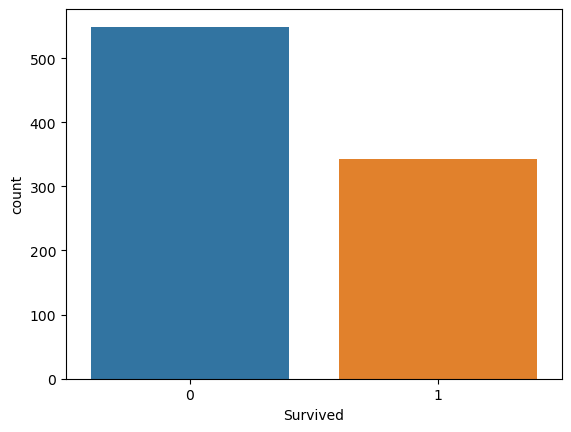

In [33]:
#checking the label distribution
sns.countplot(x ='Survived', data = pruned_df)


It's almost in 5:3 ratio - Not highly class imbalanced, though !

In [47]:
# keeping only numerical values for simplicity of the tutorial, though one can convert text to categorical ones.
X = pruned_df[['Pclass','SibSp','Fare','Parch']]
y = pruned_df['Survived']

In [48]:
# splitting the data into train_test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.35)
print("Shape of Training data is {}".format(X_train.shape))
print("Shape of Testing data is {}".format(X_test.shape))


Shape of Training data is (579, 4)
Shape of Testing data is (312, 4)


In [49]:
# implement log reg
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train,y_train)

LogisticRegression()

In [50]:
# testing the accuracy of the model
pred = log_reg.predict(X_test)
print(metrics.confusion_matrix(y_test,pred))

[[160  35]
 [ 59  58]]


In [51]:
# adding labels to visualise the confusion matrix better
matrix = pd.DataFrame(metrics.confusion_matrix(y_test,pred), index=['0','1'])

In [52]:
matrix

,0,1
0,160,35
1,59,58


In [53]:
#printing the overall accuracy
print(metrics.accuracy_score(y_test,pred))

0.6987179487179487


In [54]:
# printing classification report
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       195
           1       0.62      0.50      0.55       117

    accuracy                           0.70       312
   macro avg       0.68      0.66      0.66       312
weighted avg       0.69      0.70      0.69       312



##### End remarks
 We can increase the accuracy by using features learnt earlier i.e tf_idf
i.e by first pass x_train through count_vectorizer's fit transform followed by passing it to TFIDF fit transform